## Loading Libraries

In [2]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from skimage import data

Dimensions are: (600, 600, 3)
Number of pixels: 1080000


(0, 255, 160.92091203703703)

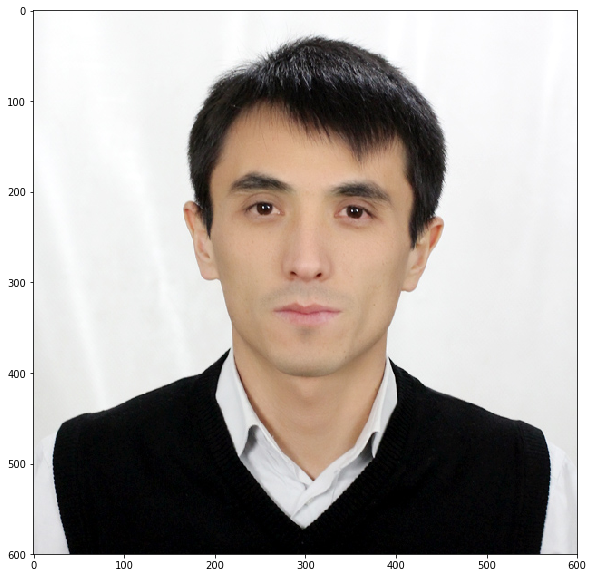

In [3]:
me = misc.imread('./wifire/image.jpg')
plt.figure(figsize=(10,10))
plt.imshow(me)
print("Dimensions are:", me.shape)
print("Number of pixels:", me.size)
me.min(), me.max(), me.mean()

## Generating the Inverse Image

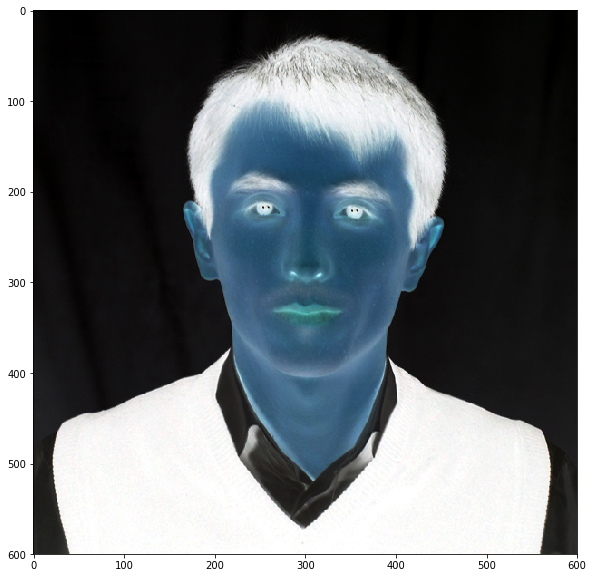

In [13]:
me_inverse = np.array(me)
me_inverse = 255 - me_inverse[:, :, :]
plt.figure(figsize=(10,10))
plt.imshow(me_inverse)

## Circular Mask

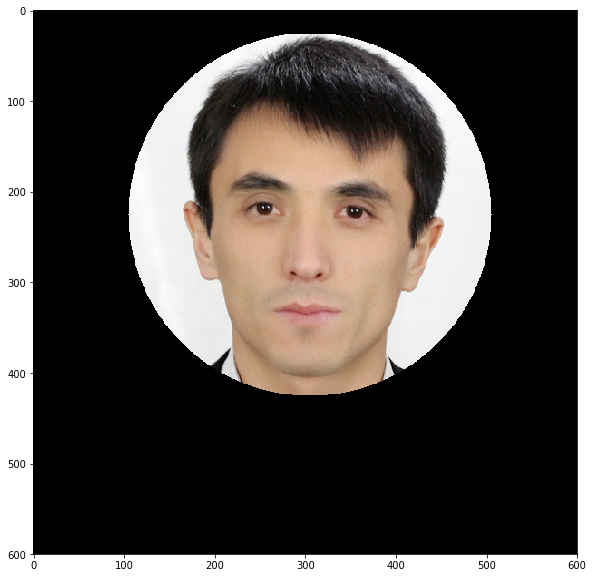

In [12]:
#copying the image
me_circular_mask = np.array(me)
#getting all coordinates
X, Y = np.ogrid[:600, :600]
#fixing the center
center_row, center_col = 225, 305
#the distance formula
dist_from_center = ((X - center_row) ** 2 + (Y - center_col) ** 2) ** 0.5
#fixing the radius
radius = 200
#masking
circular_mask = (dist_from_center > radius)
#applying the mask now
me_circular_mask[circular_mask] = 0
#sketching the graph
plt.figure(figsize=(10,10))
plt.imshow(me_circular_mask)


## Elliptic Mask

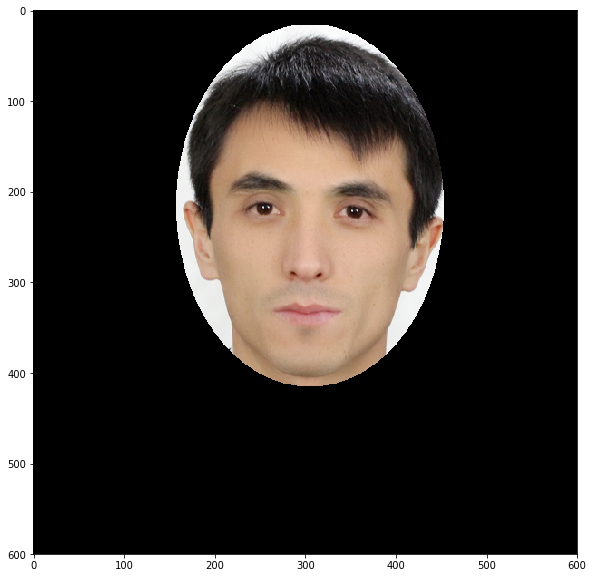

In [22]:
#copying the image
me_elliptic_mask = np.array(me)
#getting all coordinates
X, Y = np.ogrid[:600, :600]
#fixing the center
center_row_1, center_row_2, center_col_1, center_col_2 = 80, 350, 305, 305
#the distance formula
dist_to_f_1 = ((X - center_row_1) ** 2 + (Y - center_col_1) ** 2) ** 0.5
dist_to_f_2 = ((X - center_row_2) ** 2 + (Y - center_col_2) ** 2) ** 0.5
#fixing the radius
radius = 400
#masking
elliptic_mask = (dist_to_f_1 + dist_to_f_2 > radius)
#applying the mask now
me_elliptic_mask[elliptic_mask] = 0
#sketching the graph
plt.figure(figsize=(10,10))
plt.imshow(me_elliptic_mask)


## Changing the Jumper's color to Purple

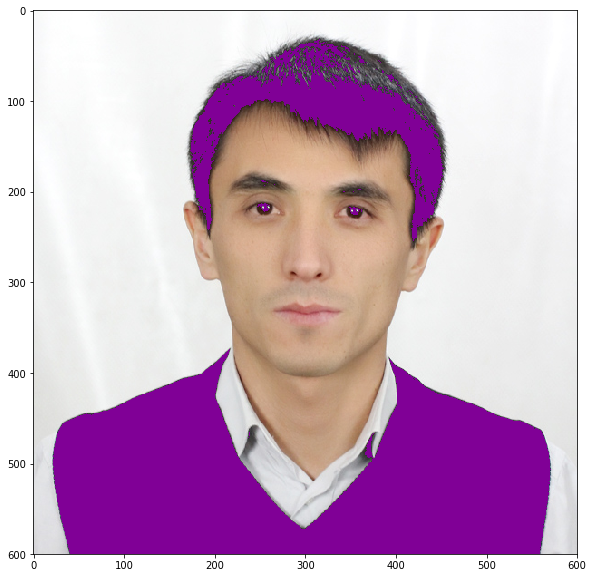

In [8]:
me = misc.imread('./wifire/image.jpg')
#copying the image
me_blue = np.array(me)
total_rows, total_cols, layers = me.shape
#getting all coordinates
X, Y = np.ogrid[:total_rows, :total_cols]
#lower half 
# half_lower = X > 300
#getting the black color
jumper_red =  me[:, :,0] < 50
jumper_green =  me[:, :,1] < 50
jumper_blue =  me[:, :,2] < 50
jumper = np.logical_and(jumper_red, jumper_green, jumper_blue)
#logical and
# final = np.logical_and(half_lower, jumper)
#applying the mask now
me_blue[jumper] = (128, 0, 150)
#sketching the graph
plt.figure(figsize=(10,10))
plt.imshow(me_blue)


Triangular Masking

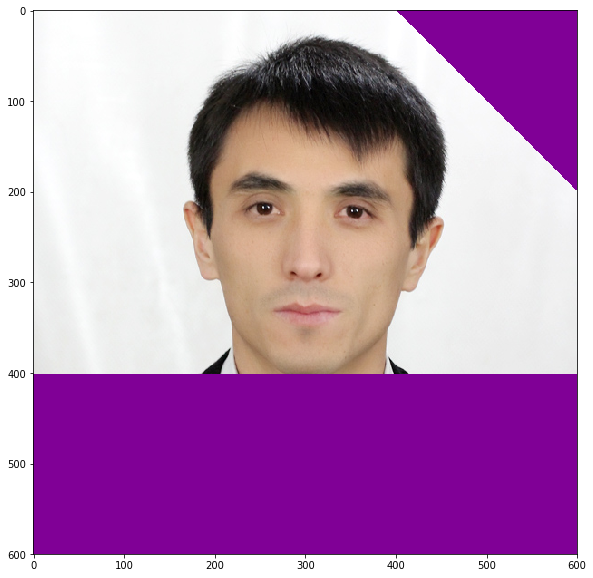

In [39]:
me = misc.imread('./wifire/image.jpg')
#copying the image
me_blue = np.array(me)
#getting all coordinates
X, Y = np.ogrid[:600, :600]
#lower half 
lower = X > 400
#lines of a triangle
l2 = Y > X + 400
l3 = Y > 600 - X
#logical and
final = np.logical_or(lower, l2, l3)
#applying the mask now
me_blue[final] = (128, 0, 150)
#sketching the graph
plt.figure(figsize=(10,10))
plt.imshow(me_blue)
